# Scan log alignment summary

This notebook takes the `'%s_map.yml'` outpute file from `'48spot alignment-Two_Mantas_load_scan_data-datetime.ipynb'` and tidies it into DataFrames for GG, GR, and RR multiscans. 

Note that `'Batch 48spot alignment.ipynb'` must be run before running this notebook. 

In [1]:
import ruamel.yaml as ruamel_yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import palettable as pal
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
colors = pal.colorbrewer.qualitative.Dark2_8
colors.show_as_blocks(50)
plt.rc('axes', prop_cycle=(cycler('color', colors.mpl_colors)))

,,,,,,,


# List of scan data

The scan parameters are univoque but other scan data such as sigmas and max counts depends on data selection.
Median is used to minimize effect of outliers and because we want to maximaze an effect for the majority of spots.
Moreover, filtering along appropriate "features" is used to remove strong outliers

In this series of scan data, 'offset' is used to exclude outliers for sigma computation.

In [2]:
filenames = ['two_mantas_map.yml']

In [3]:
d_list = []
for filename in filenames:
    with open(filename) as f:
        scan_data = ruamel_yaml.load(f)
        for v in scan_data.values():
            del v['fit_result_text']
    dx = pd.DataFrame.from_dict(scan_data, orient='index')
    d_list.append(dx)

/home/anto/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:4: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'


In [4]:
dx.tail()

,center_x,center_x_fit,center_x_fitrot,center_y,center_y_fit,center_y_fitrot,ch,datetime,f_min,integration_ms,...,pitch_y_fit,pitch_y_fitrot,pitch_y_mean,range,residue_max,rotation,sigma_x,sigma_y,step,z
2017-05-02 15-29-51,2.0,2.010041,2.010001,-67.0,-66.913803,-66.962243,G,2017-05-02 15-29-51,0.7,200,...,23.147994,23.168530,23.149167,10,1000000.0,1.382462,1.5755,1.4975,0.4,10
2017-05-02 15-30-19,2.0,2.013738,2.013749,-67.0,-66.918703,-66.967260,G,2017-05-02 15-30-19,0.7,200,...,23.151506,23.172114,23.151667,10,1000000.0,1.380384,1.5860,1.4925,0.4,10
2017-05-02 15-30-43,2.0,2.016840,2.016875,-67.0,-66.976204,-67.025031,G,2017-05-02 15-30-43,0.7,200,...,23.154499,23.175145,23.152500,10,1000000.0,1.385912,1.5630,1.5030,0.4,10
2017-05-02 15-31-01,2.0,2.016246,2.016249,-67.0,-66.987484,-67.036164,G,2017-05-02 15-31-01,0.7,200,...,23.154000,23.174618,23.152500,10,1000000.0,1.383001,1.5940,1.4925,0.4,10
2017-05-02 15-31-21,2.0,2.008159,2.008125,-67.0,-66.985668,-67.034478,G,2017-05-02 15-31-21,0.7,200,...,23.154250,23.175104,23.153333,10,1000000.0,1.394016,1.5605,1.5050,0.4,10


In [5]:
dx.columns

Index(['center_x', 'center_x_fit', 'center_x_fitrot', 'center_y',
       'center_y_fit', 'center_y_fitrot', 'ch', 'datetime', 'f_min',
       'integration_ms', 'laser', 'max_counts_corr', 'n_inliers', 'nspots_x',
       'nspots_y', 'offset_min', 'pitch_x', 'pitch_x_fit', 'pitch_x_fitrot',
       'pitch_x_mean', 'pitch_y', 'pitch_y_fit', 'pitch_y_fitrot',
       'pitch_y_mean', 'range', 'residue_max', 'rotation', 'sigma_x',
       'sigma_y', 'step', 'z'],
      dtype='object')

In [6]:
dx

,center_x,center_x_fit,center_x_fitrot,center_y,center_y_fit,center_y_fitrot,ch,datetime,f_min,integration_ms,...,pitch_y_fit,pitch_y_fitrot,pitch_y_mean,range,residue_max,rotation,sigma_x,sigma_y,step,z
2017-05-02 12-45-29,2.00,1.814361,1.814375,-67.00,-67.029321,-67.072842,G,2017-05-02 12-45-29,0.7,200,...,23.156251,23.176503,23.155833,10,1000000.0,1.372756,1.5670,1.5310,0.4,10
2017-05-02 12-47-11,2.00,1.809986,1.810000,-67.00,-67.034334,-67.078008,G,2017-05-02 12-47-11,0.7,200,...,23.158753,23.179313,23.156667,10,1000000.0,1.381368,1.5710,1.5240,0.4,10
2017-05-02 12-47-31,2.00,1.808751,1.808750,-67.00,-67.038751,-67.082420,G,2017-05-02 12-47-31,0.7,200,...,23.161503,23.182093,23.160833,10,1000000.0,1.383485,1.5760,1.5365,0.4,10
2017-05-02 12-52-37,2.00,2.524376,2.524375,-67.00,-66.959381,-67.013429,R,2017-05-02 12-52-37,0.7,200,...,23.245749,23.261742,23.243333,10,1000000.0,1.226961,1.5885,1.5075,0.4,21
2017-05-02 12-55-44,2.00,2.026257,2.026249,-67.00,-66.989371,-67.032884,R,2017-05-02 12-55-44,0.7,200,...,23.248253,23.264340,23.243333,10,1000000.0,1.230356,1.6060,1.5315,0.4,21
2017-05-02 12-56-07,2.00,2.025616,2.025625,-67.00,-66.984389,-67.028211,R,2017-05-02 12-56-07,0.7,200,...,23.246257,23.262632,23.241667,10,1000000.0,1.240029,1.6165,1.5020,0.4,21
2017-05-02 12-56-30,2.00,2.012504,2.012501,-67.00,-66.984378,-67.027703,R,2017-05-02 12-56-30,0.7,200,...,23.254755,23.270918,23.250833,10,1000000.0,1.233620,1.6010,1.5260,0.4,21
2017-05-02 13-03-07,10.68,10.680618,10.680625,19.84,19.839383,20.079559,R,2017-05-02 13-03-07,0.7,200,...,22.682726,22.699999,22.685000,10,1000000.0,-1.288589,1.6505,1.6030,0.4,21
2017-05-02 13-03-20,10.68,10.680594,10.680622,19.84,19.839351,20.083370,R,2017-05-02 13-03-20,0.7,200,...,22.690260,22.708104,22.692500,10,1000000.0,-1.309001,1.6775,1.5870,0.4,21
2017-05-02 13-04-19,10.68,10.698769,10.698750,19.84,19.839361,20.082167,R,2017-05-02 13-04-19,0.7,200,...,22.674259,22.691792,22.676667,10,1000000.0,-1.300362,1.6585,1.6145,0.4,21


# Concatenate Results

In [7]:
input_col = ['center_x', 'center_y', 'f_min', 'integration_ms', 'nspots_x', 'nspots_y', 'offset_min', 
             'pitch_x', 'pitch_y','range', 'residue_max', 'step', 'z']
output_col = ['center_x_fit', 'center_y_fit', 'max_counts_corr', 'n_inliers', 
              'pitch_x_fit', 'pitch_y_fit', 'pitch_x_fitrot', 'pitch_y_fitrot', 
              'sigma_x', 'sigma_y', 'intensity', 'z', 'datetime']

In [8]:
dfg = (pd.concat(d_list)
      .assign(intensity=lambda x: x.max_counts_corr / x.integration_ms)
      .assign(datetime=lambda x: pd.to_datetime(x.datetime, format="%Y-%m-%d %H-%M-%S"))
      .query('ch == "G"')
      .query('laser == "G"')
     ).iloc[-3:]
dfg['intensity'] = dfg.max_counts_corr / dfg.integration_ms

In [9]:
dfr = (pd.concat(d_list)
      .assign(intensity=lambda x: x.max_counts_corr / x.integration_ms)
      .assign(datetime=lambda x: pd.to_datetime(x.datetime, format="%Y-%m-%d %H-%M-%S"))
      .query('ch == "R"')
      .query('laser == "G"')       
     ).iloc[-3:]
dfr['intensity'] = dfr.max_counts_corr / dfr.integration_ms

In [10]:
dfrr = (pd.concat(d_list)
      .assign(intensity=lambda x: x.max_counts_corr / x.integration_ms)
      .assign(datetime=lambda x: pd.to_datetime(x.datetime, format="%Y-%m-%d %H-%M-%S"))
      .query('ch == "R"')
      .query('laser == "R"')       
     ).iloc[-3:]
dfrr['intensity'] = dfrr.max_counts_corr / dfrr.integration_ms

In [11]:
dfg[input_col]

,center_x,center_y,f_min,integration_ms,nspots_x,nspots_y,offset_min,pitch_x,pitch_y,range,residue_max,step,z
2017-05-02 15-30-43,2.0,-67.0,0.7,200,4,4,2000,24.3,23.14,10,1000000.0,0.4,10
2017-05-02 15-31-01,2.0,-67.0,0.7,200,4,4,2000,24.3,23.14,10,1000000.0,0.4,10
2017-05-02 15-31-21,2.0,-67.0,0.7,200,4,4,2000,24.3,23.14,10,1000000.0,0.4,10


In [12]:
dfg[output_col]

,center_x_fit,center_y_fit,max_counts_corr,n_inliers,pitch_x_fit,pitch_y_fit,pitch_x_fitrot,pitch_y_fitrot,sigma_x,sigma_y,intensity,z,datetime
2017-05-02 15-30-43,2.016840,-66.976204,25161.15,32,24.196246,23.154499,24.203035,23.175145,1.5630,1.5030,125.80575,10,2017-05-02 15:30:43
2017-05-02 15-31-01,2.016246,-66.987484,25234.00,32,24.199000,23.154000,24.205699,23.174618,1.5940,1.4925,126.17000,10,2017-05-02 15:31:01
2017-05-02 15-31-21,2.008159,-66.985668,25209.60,32,24.200249,23.154250,24.207149,23.175104,1.5605,1.5050,126.04800,10,2017-05-02 15:31:21


In [13]:
dfr[input_col]

,center_x,center_y,f_min,integration_ms,nspots_x,nspots_y,offset_min,pitch_x,pitch_y,range,residue_max,step,z
2017-05-02 12-55-44,2.0,-67.0,0.7,200,4,4,2000,24.3,23.14,10,1000000.0,0.4,21
2017-05-02 12-56-07,2.0,-67.0,0.7,200,4,4,2000,24.3,23.14,10,1000000.0,0.4,21
2017-05-02 12-56-30,2.0,-67.0,0.7,200,4,4,2000,24.3,23.14,10,1000000.0,0.4,21


In [14]:
dfr[output_col]

,center_x_fit,center_y_fit,max_counts_corr,n_inliers,pitch_x_fit,pitch_y_fit,pitch_x_fitrot,pitch_y_fitrot,sigma_x,sigma_y,intensity,z,datetime
2017-05-02 12-55-44,2.026257,-66.989371,42916.85,32,24.227495,23.248253,24.233087,23.264340,1.6060,1.5315,214.58425,21,2017-05-02 12:55:44
2017-05-02 12-56-07,2.025616,-66.984389,42870.75,32,24.236742,23.246257,24.242389,23.262632,1.6165,1.5020,214.35375,21,2017-05-02 12:56:07
2017-05-02 12-56-30,2.012504,-66.984378,42983.80,32,24.235491,23.254755,24.241129,23.270918,1.6010,1.5260,214.91900,21,2017-05-02 12:56:30


In [15]:
dfrr[output_col]

,center_x_fit,center_y_fit,max_counts_corr,n_inliers,pitch_x_fit,pitch_y_fit,pitch_x_fitrot,pitch_y_fitrot,sigma_x,sigma_y,intensity,z,datetime
2017-05-02 13-03-07,10.680618,19.839383,16614.25,32,22.945769,22.682726,22.951525,22.699999,1.6505,1.6030,83.07125,21,2017-05-02 13:03:07
2017-05-02 13-03-20,10.680594,19.839351,16661.35,32,22.947242,22.690260,22.953158,22.708104,1.6775,1.5870,83.30675,21,2017-05-02 13:03:20
2017-05-02 13-04-19,10.698769,19.839361,16942.90,32,22.948486,22.674259,22.954399,22.691792,1.6585,1.6145,84.71450,21,2017-05-02 13:04:19


# Alignment plots

### Donor SPAD fitted (x,y) pitch 
Donor SPAD under 532nm excitation.

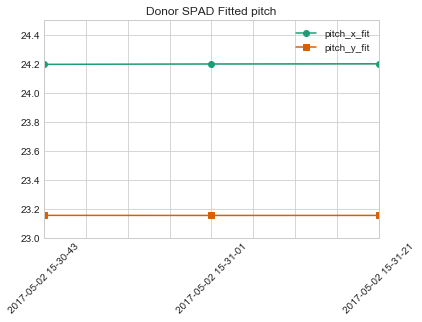

In [16]:
dfg.pitch_x_fit.plot(marker='o', rot=45)
dfg.pitch_y_fit.plot(marker='s', rot=45)
plt.ylim(23, 24.5)
plt.legend()
plt.title('Donor SPAD Fitted pitch');

### Acceptor SPAD fitted (x,y) pitch 
Acceptor SPAD under 532nm excitation.

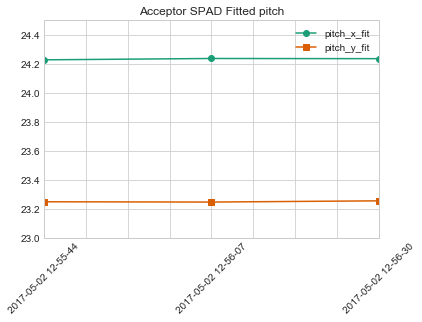

In [17]:
dfr.pitch_x_fit.plot(marker='o', rot=45)
dfr.pitch_y_fit.plot(marker='s', rot=45)
plt.ylim(23, 24.5)
plt.legend()
plt.title('Acceptor SPAD Fitted pitch');

### Acceptor SPAD fitted (x,y) pitch 
Acceptor SPAD under 628nm excitation.

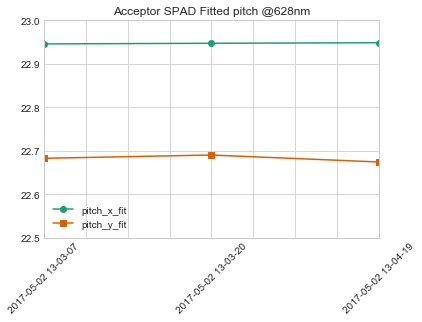

In [18]:
dfrr.pitch_x_fit.plot(marker='o', rot=45)
dfrr.pitch_y_fit.plot(marker='s', rot=45)
plt.ylim(22.5, 23)
plt.legend()
plt.title('Acceptor SPAD Fitted pitch @628nm');

# Fitted LCOS positions

## Pitch X, Green LCOS

In [19]:
accept_pitch_x = dfr.pitch_x_fit.mean()
accept_pitch_x

24.233242954119106

In [20]:
accept_pitch_xrot = dfr.pitch_x_fitrot.mean()
accept_pitch_xrot

24.238868430044704

In [21]:
donor_pitch_x = dfg.pitch_x_fit.mean()
donor_pitch_x

24.198498158502517

#### Mean X-pitch
An average of two pitches from fitted multiscan results. 

In [22]:
donor_pitch_xrot = dfg.pitch_x_fitrot.mean()
donor_pitch_xrot

24.205294450007624

In [23]:
np.round(0.5*(donor_pitch_x + accept_pitch_x), 2)

24.219999999999999

## Pitch Y, Green LCOS

In [24]:
accept_pitch_y = dfr.pitch_y_fit.mean()
accept_pitch_y

23.249755033719779

In [25]:
accept_pitch_yrot = dfr.pitch_y_fitrot.mean()
accept_pitch_yrot

23.265963676858195

In [26]:
donor_pitch_y = dfg.pitch_y_fit.mean()
donor_pitch_y

23.154249766912994

In [27]:
donor_pitch_yrot = dfg.pitch_y_fitrot.mean()
donor_pitch_yrot

23.17495570240597

In [28]:
np.round(0.5*(donor_pitch_y + accept_pitch_y), 2)

23.199999999999999

## Red LCOS

In [29]:
Raccept_pitch_x = dfrr.pitch_x_fit.mean()
Raccept_pitch_x

22.947165673095736

In [30]:
Raccept_pitch_xrot = dfrr.pitch_x_fitrot.mean()
Raccept_pitch_xrot

22.953027555915316

In [31]:
Raccept_pitch_y = dfrr.pitch_y_fit.mean()
Raccept_pitch_y

22.682415108299413

In [32]:
Raccept_pitch_yrot = dfrr.pitch_y_fitrot.mean()
Raccept_pitch_yrot

22.699964858437639

## Rotation
Rotation of the SPADs over time

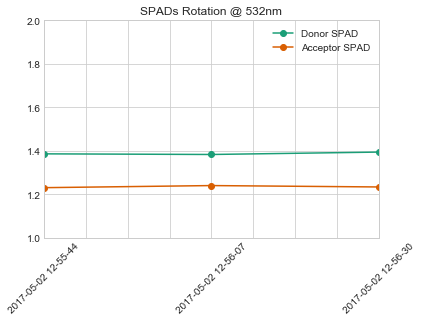

In [33]:
dfg.rotation.plot(marker='o', rot=45)
dfr.rotation.plot(marker='o', rot=45)
plt.title('SPADs Rotation @ 532nm');
plt.ylim(1, 2)
plt.legend(['Donor SPAD', 'Acceptor SPAD'])

In [34]:
dfg.rotation.mean(), dfr.rotation.mean(), dfrr.rotation.mean()

(1.3876428172241839, 1.234668323651986, -1.2993172809102276)

In [35]:
np.mean([dfg.rotation.mean(), dfr.rotation.mean()])

1.3111555704380851

(-1, -2)

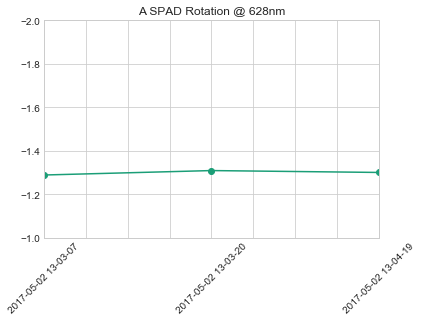

In [36]:
dfrr.rotation.plot(marker='o', rot=45)
plt.title('A SPAD Rotation @ 628nm');
plt.ylim(-1, -2)